### Importing Labraries

In [1]:
# Before running this script, make sure you have installed the pytorch

import subprocess
import sys
import importlib.util
import psutil
import os


def check_and_install(package):
    """
        This function checks if a package is installed and installs it if not.
    """

    if importlib.util.find_spec(package) is None:
        print(f"{package} not found, installing...")
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])
        print(f"{package} has been installed")
    
# List of packages to check, with any special names or setup functions
packages = [
    "pandas",
    "numpy",
    "matplotlib",
    "seaborn",
    "scikit-learn",
    "scipy",
    "tqdm",
    "pandarallel",
    "thinc",
    "srsly",
    "fastai"
]

# Loop through each package, importing and installing if needed
for package in packages:
    check_and_install(package)


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from fastai.tabular.all import TabularPandas, Categorify, Normalize


from pandarallel import pandarallel

real_cpu_count = psutil.cpu_count(logical=False)
pandarallel.initialize(progress_bar=True)
curr_dir = os.getcwd()
parent_dir = os.path.dirname(curr_dir)
sys.path.append(parent_dir)

scikit-learn not found, installing...
scikit-learn has been installed
INFO: Pandarallel will run on 16 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


### Importing the Dataset filled (No NaNs, in the interesting columns )

In [2]:
MergedDataset = pd.read_csv('../dataset/engineered_df.csv')

MergedDataset.sample(5)

,name_cyclist,name_race,pca_race_points,physical_score,race_difficulty,combined_score_per_km,consistency_score,race_performance_score,nationality
207406,marcus-burghardt,tour-de-suisse/2017/stage-5,-0.271745,13.838095,739.34625,1.539806,2158.576867,90.999633,Germany
110346,laurent-biondi,tour-de-france/1993/stage-19,-0.271745,13.828516,159.19350,15.029937,2630.398918,18.898302,France
332696,matteo-tosatto,vuelta-a-espana/2014/stage-9,-0.271745,16.245304,617.42150,2.539659,2389.623674,39.199559,Italy
130970,mauro-facci,tour-de-france/2005/stage-9,-0.271745,9.424176,570.47775,3.589690,3218.223741,16.099523,Italy
292040,daniel-moreno,tour-de-france/2010/stage-3,-0.271745,11.804624,698.38350,3.163554,2658.339040,90.299617,Spain


### Dataframe pre-processing

In [3]:
from outliers_code.utils import encode_tabular_data

cont_features = ['pca_race_points', 'physical_score', 'race_difficulty', 'combined_score_per_km', 'consistency_score', 'race_performance_score']
cat_features = ['nationality']

df_encoded = encode_tabular_data(MergedDataset, cat_features, cont_features)

### Local Outlier Factor (LOF) Algorithm

The first algorithm to detect outliers is LOF, which is great for datasets where the data density varies. It detects outliers by computing, for each point, the distance to its k-nearest neighbors. Afterwards, LOF computes a local reachability density (LRD). The LRD measures how densely packed its neighborhood is, based on the distance to its k-nearest neighbors. A point with sparse surroundings will have a high LOF score, and a point with dense surroundings will have a low LOF score. Thus, to identify outliers, it is sufficient to find those points that have a high LOF score.

In [ ]:
# import local class
from outliers_code.outliers_detection_lof import LOFOutliersDetector

detector = LOFOutliersDetector()

# outliers_lof = detector.fit_predict_with_search(df_encoded)
outliers_lof = detector.fit_predict_with_search(df_encoded)





Processing params: LOFParams(n_neighbors=15, contamination=np.float64(0.2), leaf_size=30, p=np.int64(1), metric=np.str_('euclidean'))
Processing params: LOFParams(n_neighbors=36, contamination=np.float64(0.2), leaf_size=36, p=np.int64(1), metric=np.str_('manhattan'))
Processing params: LOFParams(n_neighbors=47, contamination=np.float64(0.05), leaf_size=44, p=np.int64(1), metric=np.str_('minkowski'))
Processing params: LOFParams(n_neighbors=23, contamination=np.float64(0.2), leaf_size=45, p=np.int64(2), metric=np.str_('euclidean'))
Processing params: LOFParams(n_neighbors=20, contamination=np.float64(0.2), leaf_size=36, p=np.int64(2), metric=np.str_('euclidean'))
Processing params: LOFParams(n_neighbors=23, contamination=np.float64(0.01), leaf_size=20, p=np.int64(2), metric=np.str_('euclidean'))
Processing params: LOFParams(n_neighbors=30, contamination=np.float64(0.15), leaf_size=29, p=np.int64(2), metric=np.str_('euclidean'))
Processing params: LOFParams(n_neighbors=25, contamination=


Isolation Forest Detection Results

Best Parameters:
  n_estimators:      176
  max_samples:       0.4855204322254839
  contamination:     0.01167093935176753
  max_features:      0.4572413329208046
  bootstrap:         True
  Score:            0.6098

Detection Statistics:
  Total points:      586,939
  Outliers found:    6,851 (1.2%)
  Inliers retained:  580,088 (98.8%)
  Contamination:     1.2%

Isolation Forest Score Distribution:
  Min score:     -0.09
  Max score:     0.22
  Mean score:    -0.02
  Median score:  -0.03

Score Percentiles:
  25th: -0.04
  75th: -0.00
Variance explained by 3 PCs: 99.1%

Interactive Controls:
- Use arrow keys to rotate and tilt the plots
- Close the plot window to exit


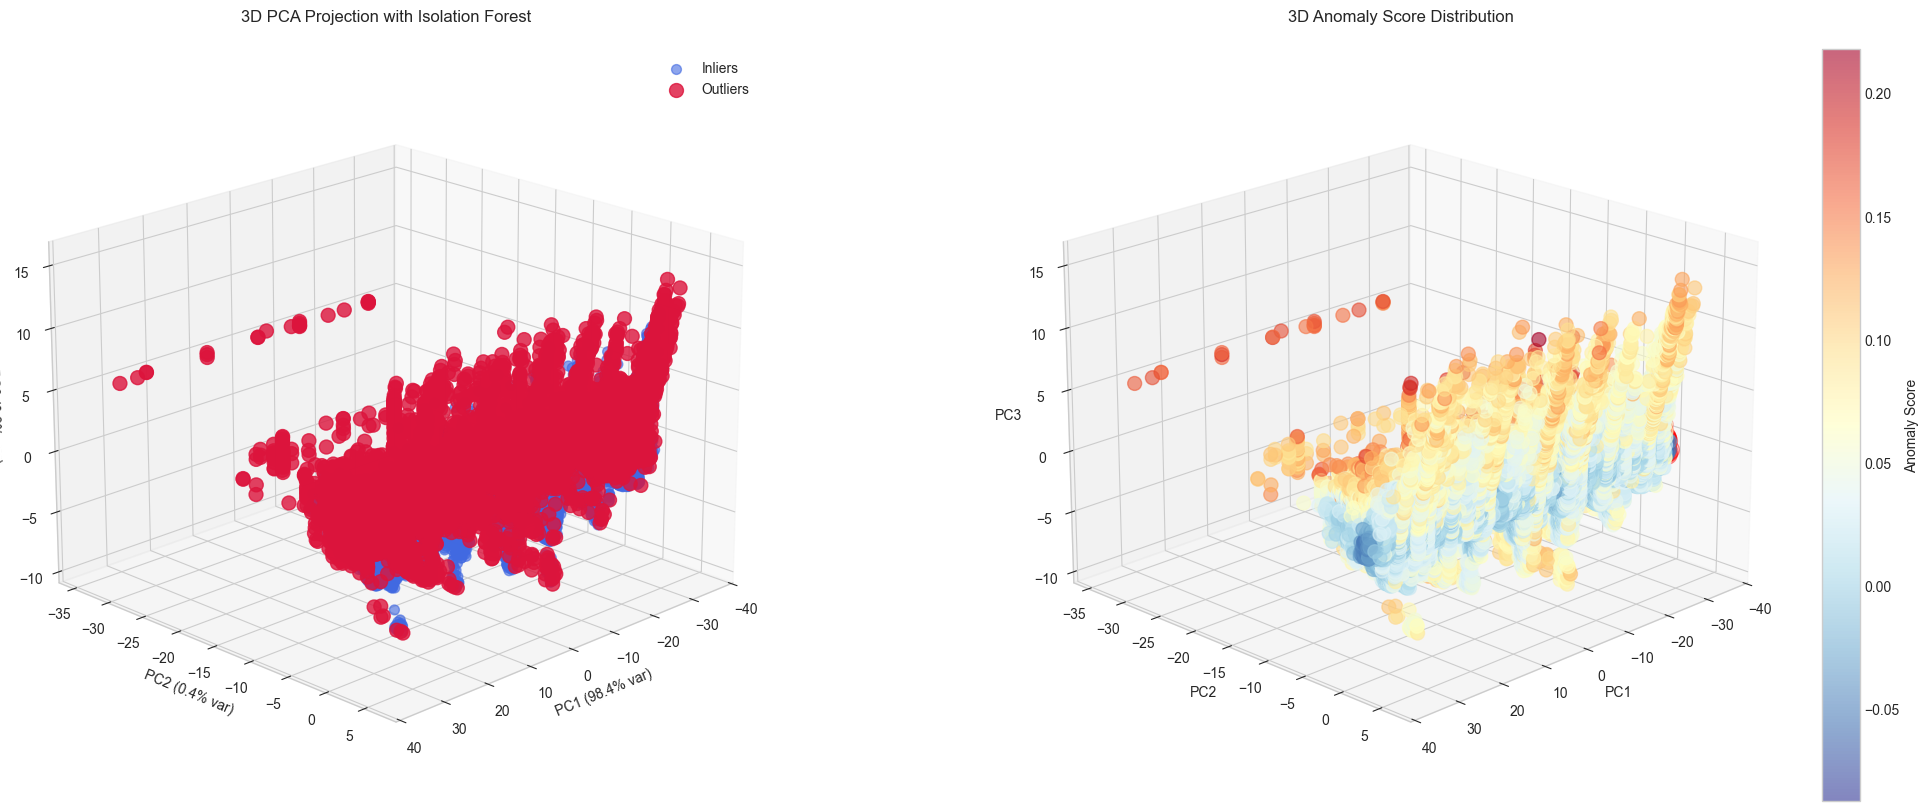

In [22]:
from outliers_code.outliers_detection_iso_for import IsolationForestDetector

detector = IsolationForestDetector()

outliers_iso_for =  detector.fit_predict_with_search(df_encoded)

One-Class SVM Will Run ON GPU ID: 0


Parameter Search:   0%|          | 0/25 [00:00<?, ?it/s]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.005963769968203689, gamma=0.0001339644496693281)


Parameter Search:   4%|▍         | 1/25 [00:02<00:48,  2.02s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.009407161558624814, gamma=6.348123509587817e-05)


Parameter Search:   8%|▊         | 2/25 [00:04<00:54,  2.38s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.013724080575086992, gamma=1.167188192586188e-05)


Parameter Search:  12%|█▏        | 3/25 [00:08<01:03,  2.88s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.007622121040466197, gamma=1.2844119924511745e-05)


Parameter Search:  16%|█▌        | 4/25 [00:10<00:54,  2.61s/it]

Processing params: SVMParams(kernel=np.str_('sigmoid'), nu=0.007803832412361076, gamma=1.1610100738185147e-05)


Parameter Search:  20%|██        | 5/25 [00:11<00:44,  2.24s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.005110332812944259, gamma=8.694963867509436e-05)


Parameter Search:  24%|██▍       | 6/25 [00:13<00:39,  2.07s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.008998369167109246, gamma=0.0013223212167321888)


Parameter Search:  28%|██▊       | 7/25 [00:16<00:39,  2.22s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.012232838794723151, gamma=1.2935556803864611e-05)


Parameter Search:  32%|███▏      | 8/25 [00:19<00:42,  2.50s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.013906407835421956, gamma=0.012666524079766133)


Parameter Search:  36%|███▌      | 9/25 [00:22<00:45,  2.86s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.007866364911333624, gamma=0.2896787960464679)


Parameter Search:  40%|████      | 10/25 [00:25<00:42,  2.81s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.011551471871951628, gamma=0.06678897308277051)


Parameter Search:  44%|████▍     | 11/25 [00:28<00:41,  2.93s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.00884944347571027, gamma=0.0019686425632615048)


Parameter Search:  48%|████▊     | 12/25 [00:31<00:36,  2.79s/it]

Processing params: SVMParams(kernel=np.str_('sigmoid'), nu=0.005415158808966972, gamma=1.1275421293445176e-05)


Parameter Search:  52%|█████▏    | 13/25 [00:32<00:27,  2.32s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.013137998428007967, gamma=0.0378588945194836)


Parameter Search:  56%|█████▌    | 14/25 [00:36<00:29,  2.69s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.009264011613069268, gamma=6.927358265167971e-05)


Parameter Search:  60%|██████    | 15/25 [00:38<00:26,  2.64s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.005795169841661491, gamma=4.5365517711176836e-05)


Parameter Search:  64%|██████▍   | 16/25 [00:40<00:21,  2.40s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.00503931040602871, gamma=0.0017843687352009443)


Parameter Search:  68%|██████▊   | 17/25 [00:42<00:17,  2.19s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.007388104314901606, gamma=0.0004824246261309752)


Parameter Search:  72%|███████▏  | 18/25 [00:44<00:15,  2.19s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.013447599207440566, gamma=4.874482591892306e-05)


Parameter Search:  76%|███████▌  | 19/25 [00:47<00:15,  2.56s/it]

Processing params: SVMParams(kernel=np.str_('sigmoid'), nu=0.008874348706940057, gamma=4.709556583614228e-05)


Parameter Search:  80%|████████  | 20/25 [00:49<00:11,  2.30s/it]

Processing params: SVMParams(kernel=np.str_('sigmoid'), nu=0.010369789174758616, gamma=0.1415659988882629)


Parameter Search:  84%|████████▍ | 21/25 [00:53<00:11,  2.80s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.0068841466463624625, gamma=0.049719764584660125)


Parameter Search:  88%|████████▊ | 22/25 [00:55<00:07,  2.64s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.00791994463917367, gamma=3.95477015978852e-05)


Parameter Search:  92%|█████████▏| 23/25 [00:57<00:05,  2.52s/it]

Processing params: SVMParams(kernel=np.str_('sigmoid'), nu=0.013920430451941024, gamma=2.5841662776158068e-05)


Parameter Search:  96%|█████████▌| 24/25 [01:00<00:02,  2.47s/it]

Processing params: SVMParams(kernel=np.str_('rbf'), nu=0.011852680752993686, gamma=0.00018721648683749036)


Parameter Search: 100%|██████████| 25/25 [01:03<00:00,  2.53s/it]



GPU One-Class SVM Detection Results

Best Parameters:
  Kernel:     rbf
  Nu:         0.006
  Gamma:      0.0001
  Score:      1.0000

Detection Statistics:
  Total points:      586,939
  Outliers found:    3,502 (0.6%)
  Inliers retained:  583,437 (99.4%)

Anomaly Score Distribution:
  Min score:     -15.40
  Max score:     1963.09
  Mean score:    635.70
  Median score:  510.73

Score Percentiles:
  25th: 267.50
  75th: 1234.47
  90th: 1336.69
  95th: 1403.87
  99th: 1539.12

Visualization Controls:
  - Use mouse to rotate 3D plots
  - Scroll to zoom in/out
  - Right-click and drag to pan



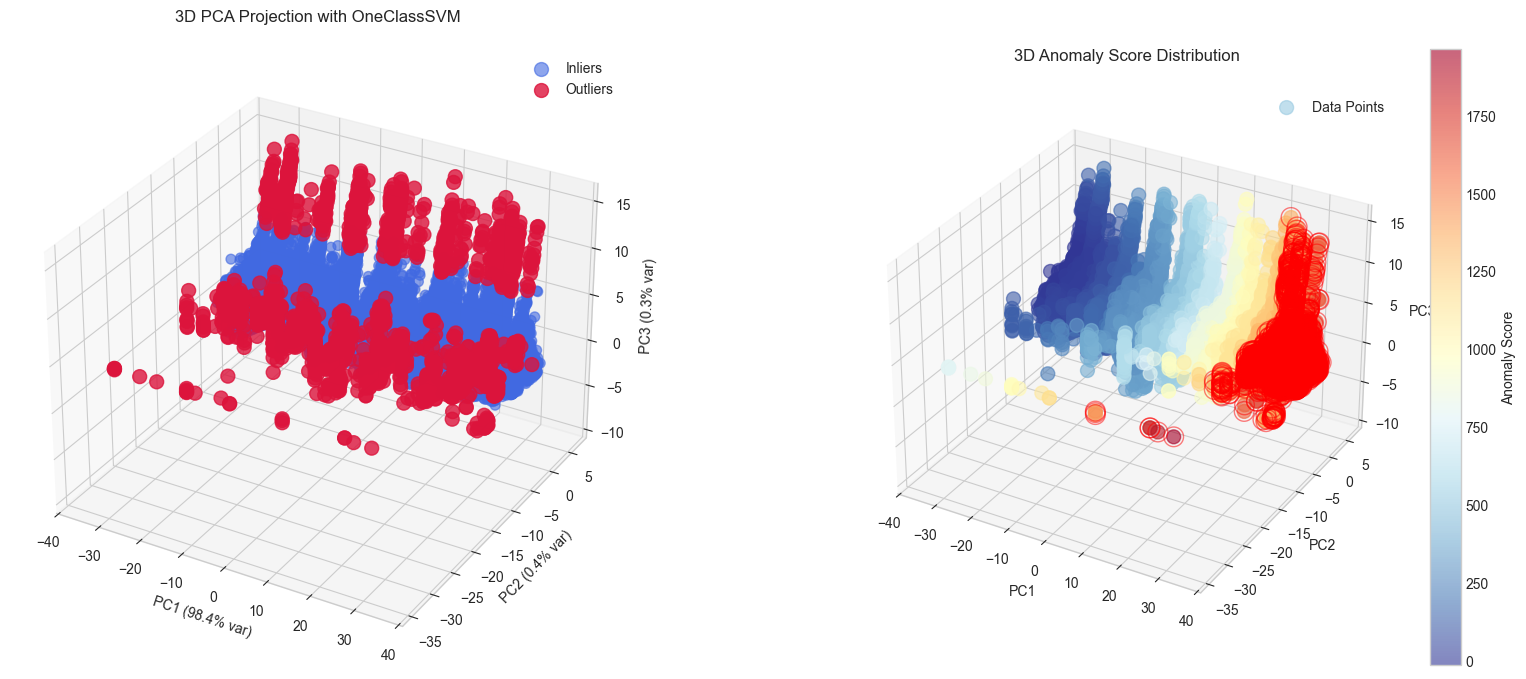

Variance explained by 3 PCs: 99.1%

Interactive Controls:
- Use arrow keys to rotate and tilt the plots
- Close the plot window to exit


In [23]:
# Warning: installing gpu libraries
# 
# git clone https://github.com/Xtra-Computing/thundersvm.git 
# cd thundersvm
# mkdir build
# cd build
# cmake .. -DUSE_CUDA=ON -DUSE_DOUBLE=ON 
# make -j4
# cd ../python
# pip install . (ensure you are in rapids-24.10 environment)


from outliers_code.outliers_detection_oc_svm_gpu import GPUOneClassSVMDetector

# detector = GPUOneClassSVMDetector(nu=0.07, kernel='rbf', gamma='scale')
detector = GPUOneClassSVMDetector()

outliers_oc_svm_gpu = detector.fit_predict_with_search(df_encoded, n_iter=25)
# outliers_oc_svm_gpu = detector.fit_predict(df_encoded)